In [ ]:
import math
import pandas as pd
import json

with open("json_merge.json", 'r', encoding='utf-8-sig') as f:
    data = json.load(f)
    
rows = []

for item in data["questions"]:
    status_list = item["status"]
    
    for i in range(len(status_list)):
        current_status = status_list[i]

        sx = 100 if current_status["s"] >= 56 else current_status["s"]

        rows.append({
            "speed_ratio": current_status["speed"] / 91.99920667582167,
            "s": sx,
            "q": current_status["q"],
        })

df = pd.DataFrame(rows)

pd.options.display.float_format = '{:.4f}'.format
df

,speed_ratio,s,q
0,0.6598,100,5
1,0.1856,100,5
2,0.0619,100,5
3,0.6083,19,0
4,0.2577,19,1
...,...,...,...
214,0.5361,0,0
215,0.0722,2,0
216,0.3402,9,3
217,0.2371,0,0


In [3]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import xgboost as xgb

X = df[['speed_ratio', 's']]
y = df['q']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

clf_xgb = xgb.XGBClassifier(
    objective='multi:softprob', 
    eval_metric='mlogloss', 
    random_state=42
)

cv_scores = cross_val_score(clf_xgb, X, y, cv=skf, scoring='accuracy')

print(f"CV Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean() * 100:.2f}%")

CV Accuracy Scores: [0.65909091 0.59090909 0.63636364 0.65909091 0.72093023]
Mean CV Accuracy: 65.33%


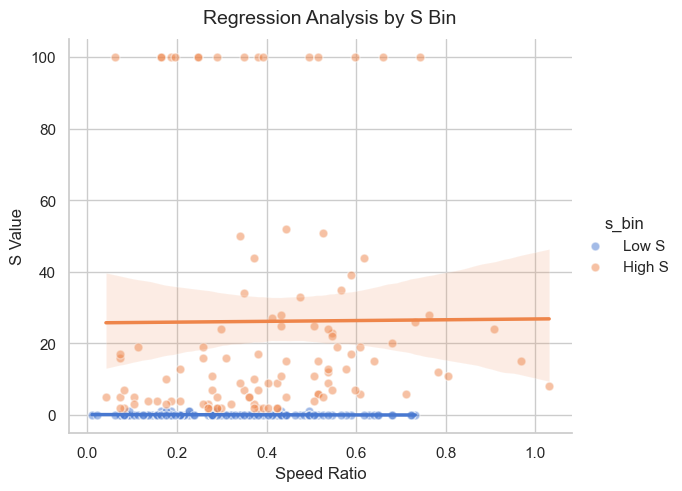

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df['s_bin'] = pd.qcut(df['s'], q=2, labels=['Low S', 'High S'])

sns.set_theme(style='whitegrid', palette='muted')

g = sns.lmplot(
    x='speed_ratio', 
    y='s', 
    hue='s_bin', 
    data=df,
    aspect=1.2,
    height=5,
    scatter_kws={'alpha': 0.5, 's': 40, 'edgecolor': 'w'},
    line_kws={'linewidth': 2.5}
)

g.set_axis_labels("Speed Ratio", "S Value")
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Regression Analysis by S Bin', fontsize=14)

plt.show()


In [ ]:
from matplotlib import pyplot

with open("json_merge.json", 'r', encoding='utf-8-sig') as f:
    data = json.load(f)
    
scs = []

for smax in range(0, 100):

    rows = []

    for item in data["questions"]:
        status_list = item["status"]
        
        for i in range(len(status_list)):
            current_status = status_list[i]

            sx = 100 if current_status["s"] >= smax else current_status["s"]

            rows.append({
                "speed_ratio": current_status["speed"] / 91.99920667582167,
                "s": sx,
                "q": current_status["q"],
            })

    df = pd.DataFrame(rows)

    X = df[['speed_ratio', 's']]
    y = df['q']

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    clf_xgb = xgb.XGBClassifier(
        objective='multi:softprob', 
        eval_metric='mlogloss', 
        random_state=42
    )

    cv_scores = cross_val_score(clf_xgb, X, y, cv=skf, scoring='accuracy')
    scs.append(cv_scores.mean() * 100)

KeyError: 'r0'

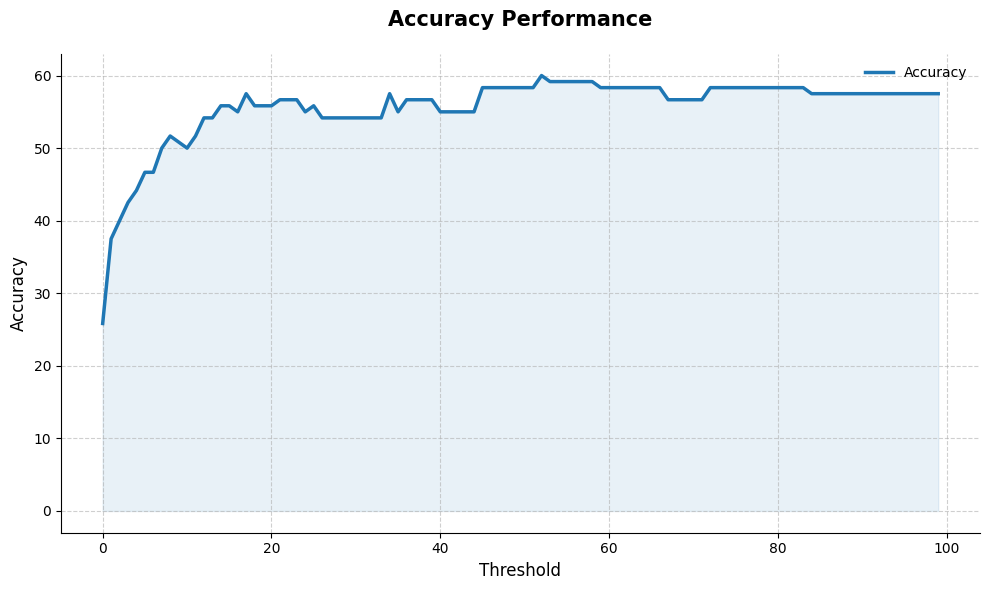

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-muted')

plt.figure(figsize=(10, 6), dpi=100)

plt.plot(range(0, 100), scs, color='#1f77b4', lw=2.5, label='Accuracy', antialiased=True)

plt.fill_between(range(0, 100), scs, color='#1f77b4', alpha=0.1)

plt.title('Accuracy Performance', fontsize=15, pad=20, fontweight='bold')
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(frameon=False, fontsize=10)

plt.tight_layout()
plt.show()
